In [2]:
import netCDF4 as nc
import glob
import numpy as np
import datetime
import xarray as xr
from matplotlib import pyplot as plt
from scipy import stats
import math
from datetime import date

In [1]:
#https://portal.nccs.nasa.gov/datashare/GlobalFWI/v2.0/fwiCalcs.MERRA2/Default/MERRA2/2020/FWI.MERRA2.Monthly.Default.202008.nc
start_str = 'https://portal.nccs.nasa.gov/datashare/GlobalFWI/v2.0/fwiCalcs.MERRA2/Default/MERRA2/'
mid_str = '/FWI.MERRA2.Monthly.Default.'
months = [31,28,31,30,31,30,31,31,30,31,30,31]
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
day = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
paths_list = []
temp_str = 'temp'
for i in range(40):
    for j in range(12):
            temp_str = start_str + str(1981+i) + mid_str + str(1981+i) +month[j]  + '.nc'
            paths_list.append(temp_str)
#print(paths_list)   
with open('nc_file_paths.txt', 'w') as paths:
    for listitem in paths_list:
        paths.write('%s\n' % listitem)
    

In [5]:
dt_parse = '%Y%m'
def get_date_num(stri):
    date1 = datetime.datetime.strptime(stri, dt_parse)
    return(date.toordinal(date1.date()))
list_of_paths = glob.glob('C:/Users/Patrick/Desktop/175_final/global_fwi_analysis/FWI_nc\'s/*.nc', recursive=True)
nc_list = []
nc_date_list = []
nc_date_key = []
for path in list_of_paths:
    nc_list.append(nc.Dataset(path))
    nc_date_list.append(get_date_num(path[-9:-3]))
    nc_date_key.append(path[-9:-3])
#nc_dict = dict(zip(nc_date_key, nc_list))

In [6]:
print(nc_dict)

<ipython-input-6-43c4295029c3>:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(nc_dict)


{'198101': <class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    History:: history
    History: 21-Dec-2016 10:19:04
    Source:: source
    Source: Robert Field
    Title:: title
    Title: Global Fire Weather Database
    Center:: center
    Center: NASA GISS / Columbia University
    Name:: Descriptive name for configuration
    Name: Default
    minLat:: Min latitude for analysis
    minLat: -58.0
    maxLat:: Max latitude for analysis
    maxLat: 75.0
    minLandFrac:: Minimum grid cell land fraction for analysis
    minLandFrac: 0.1
    minT:: Mask out anything with mean annual Tsurf less than this
    minT: -10.0
    minPrec:: Mask out anything with mean annual prec less than this
    minPrec: 0.25
    snoDThresh:: Minimum depth (m) for there to be considered snow on ground at any given time
    snoDThresh: 0.01
    snowCoverDaysCalc:: Number of days prior to spring over which to determine if winter had substantial snow cover
 

In [6]:
merpa = nc.Dataset('FWI.MERRA2.Monthly.Default.198711.nc')
print(nc_list[0])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    History:: history
    History: 21-Dec-2016 10:19:04
    Source:: source
    Source: Robert Field
    Title:: title
    Title: Global Fire Weather Database
    Center:: center
    Center: NASA GISS / Columbia University
    Name:: Descriptive name for configuration
    Name: Default
    minLat:: Min latitude for analysis
    minLat: -58.0
    maxLat:: Max latitude for analysis
    maxLat: 75.0
    minLandFrac:: Minimum grid cell land fraction for analysis
    minLandFrac: 0.1
    minT:: Mask out anything with mean annual Tsurf less than this
    minT: -10.0
    minPrec:: Mask out anything with mean annual prec less than this
    minPrec: 0.25
    snoDThresh:: Minimum depth (m) for there to be considered snow on ground at any given time
    snoDThresh: 0.01
    snowCoverDaysCalc:: Number of days prior to spring over which to determine if winter had substantial snow cover
    snowCove

<ipython-input-6-de2138de7839>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(nc_list[0])


In [12]:
fwi = []
for i in nc_list:
    fwi.append(i['MERRA2_FWI'][0])
#nc_dict = dict(zip(nc_date_key, fwi))
#print(nc_dict)
#print(fwi)

<ipython-input-12-f8433fdf91fc>:3: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  fwi.append(i['MERRA2_FWI'][0])
<ipython-input-12-f8433fdf91fc>:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  fwi.append(i['MERRA2_FWI'][0])


In [25]:
fwi_array = np.dstack(fwi)
print(np.shape(fwi_array))
print((nc_date_key))

(267, 576, 476)
['198101', '198102', '198103', '198104', '198105', '198106', '198107', '198108', '198109', '198110', '198111', '198112', '198201', '198202', '198203', '198204', '198205', '198206', '198207', '198208', '198209', '198210', '198211', '198212', '198301', '198302', '198303', '198304', '198305', '198306', '198307', '198308', '198309', '198310', '198311', '198312', '198401', '198402', '198403', '198404', '198405', '198406', '198407', '198408', '198409', '198410', '198411', '198412', '198501', '198502', '198503', '198504', '198505', '198506', '198507', '198508', '198509', '198510', '198511', '198512', '198601', '198602', '198603', '198604', '198605', '198606', '198607', '198608', '198609', '198610', '198611', '198612', '198701', '198702', '198703', '198704', '198705', '198706', '198707', '198708', '198709', '198710', '198711', '198712', '198801', '198802', '198803', '198804', '198805', '198806', '198807', '198808', '198809', '198810', '198811', '198812', '198901', '198902', '19

In [26]:
years = list(range(1985, 2019))
for i in range(len(years)):
    years[i] = str(years[i])
print(years)
monthly_list = []

for year in years:
    temp_array_list = []
    for i in range(476):
        if(nc_date_key[i][0:4] == year):
            temp_array_list.append(fwi_array[:,:,i])
    print(len(temp_array_list))
    avg_array = np.empty((267,576))
    avg_array[:] = np.nan
    for j in range(267):
        for k in range(576):
            point_list = []
            for q in range(len(temp_array_list)):
                point_list.append(temp_array_list[q][j,k])
            avg_array[j,k] = np.nanmean(np.array(point_list))
    monthly_list.append(avg_array)
                
            
            

['1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']
12


<ipython-input-26-a032fe25b034>:20: RuntimeWarning: Mean of empty slice
  avg_array[j,k] = np.nanmean(np.array(point_list))


12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12


34
(267, 576, 34)


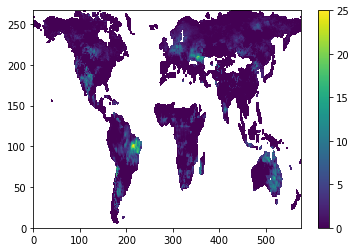

In [164]:
print(len(monthly_list))
plt.pcolormesh(monthly_list[-1]-monthly_list[0], vmin = 0, vmax = 25)
plt.colorbar()
year_from_start = np.array(list(range(34)))

yearly_array = np.dstack(monthly_list)
print(np.shape(yearly_array))

-0.0026292335220779216 0.8167984690873058


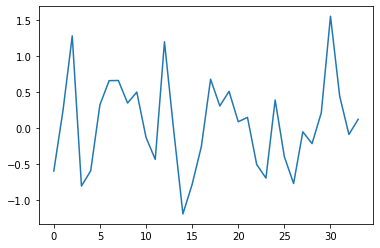

In [203]:
ONI = np.genfromtxt('oni.csv', delimiter=',')[0]

o_trend_slope, o_trend_intercept, o_trend_rvalue, o_trend_pvalue, o_trend_stderr = stats.linregress(year_from_start, ONI)
print(o_trend_slope, o_trend_pvalue)
ONI_detrend = ONI - o_trend_slope*year_from_start
plt.plot(ONI_detrend)

In [63]:
t_trend_slope = np.empty([267, 576])
t_trend_intercept = np.empty([267, 576])
t_trend_rvalue = np.empty([267, 576])
t_trend_pvalue = np.empty([267, 576])
t_trend_stderr = np.empty([267, 576])

t_fwi_point = np.empty([34])
for i in range(267):
    for j in range(576):
        t_fwi_point = yearly_array[i,j,:]
        #print(np.nanmean(fwi_point))
        if((~np.isnan(np.nanmean(t_fwi_point)))):
            #print(np.nanmean(fwi_point))
            mask = ~np.isnan(t_fwi_point) & ~np.isnan(year_from_start)
            t_trend_slope[i,j], t_trend_intercept[i,j], t_trend_rvalue[i,j], t_trend_pvalue[i,j], t_trend_stderr[i,j] = stats.linregress(year_from_start[mask], t_fwi_point[mask])
        else:
            t_trend_slope[i,j] = np.float('NaN')
            t_trend_pvalue[i,j] = np.float('NaN')
        

<ipython-input-63-d51742e64881>:12: RuntimeWarning: Mean of empty slice
  if((~np.isnan(np.nanmean(t_fwi_point)))):


In [207]:
of_trend_slope = np.empty([267, 576])
of_trend_intercept = np.empty([267, 576])
of_trend_rvalue = np.empty([267, 576])
of_trend_pvalue = np.empty([267, 576])
of_trend_stderr = np.empty([267, 576])

of_fwi_point = np.empty([34])
for i in range(267):
    for j in range(576):
        of_fwi_point = yearly_fwi_detrend[i,j,:]
        #print(np.nanmean(fwi_point))
        if((~np.isnan(np.nanmean(of_fwi_point)))):
            #print(np.nanmean(fwi_point))
            mask = ~np.isnan(of_fwi_point) & ~np.isnan(ONI_detrend)
            of_trend_slope[i,j], of_trend_intercept[i,j], of_trend_rvalue[i,j], of_trend_pvalue[i,j], of_trend_stderr[i,j] = stats.linregress(ONI_detrend[mask], of_fwi_point[mask])
        else:
            of_trend_slope[i,j] = np.float('NaN')
            of_trend_pvalue[i,j] = np.float('NaN')

<ipython-input-207-335ffd6374b3>:12: RuntimeWarning: Mean of empty slice
  if((~np.isnan(np.nanmean(of_fwi_point)))):


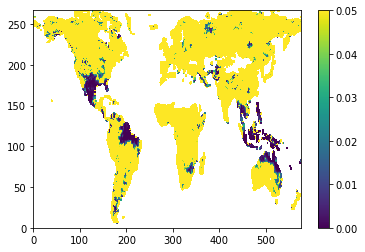

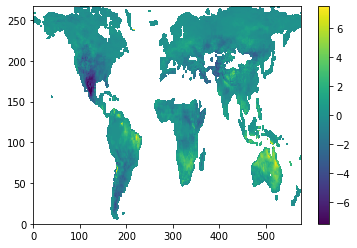

In [221]:
plt.figure(1)
plt.pcolormesh(of_trend_pvalue, vmin=0, vmax=.05)
plt.colorbar()
plt.figure(2)
plt.pcolormesh(of_trend_slope, vmin=-7.5, vmax=7.5)
plt.colorbar()

-15569.33567608862 1.5609707319878629e-25


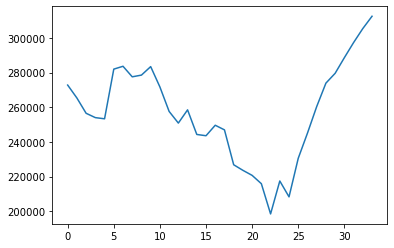

In [199]:

a_trend_slope, a_trend_intercept, a_trend_rvalue, a_trend_pvalue, a_trend_stderr = stats.linregress(year_from_start, deforestation)
print(a_trend_slope, a_trend_pvalue)
amazon_detrend = deforestation - a_trend_slope*year_from_start
plt.plot(amazon_detrend)

34


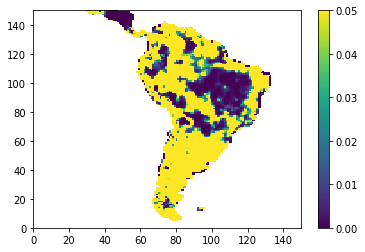

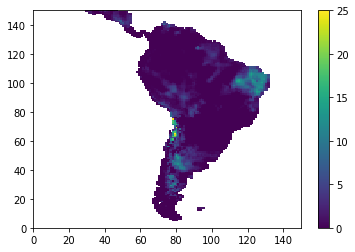

In [222]:
yearly_fwi_detrend = np.empty((267, 576, 34))

for i in range(34):
    yearly_fwi_detrend[:,:,i] = yearly_array[:,:,i] - i*t_trend_slope[:,:]
#for i in range(34):
    #yearly_fwi_detrend[:,:,i] = yearly_fwi_detrend[:,:,i] - i*of_trend_slope[:,:]

#for i in range(267):
    #for j in range(576):
        #if(t_trend_pvalue[i,j] > 0.05):
            #yearly_fwi_detrend[i,j,:] = np.float('NaN')
plt.figure(1)
plt.pcolormesh(t_trend_pvalue[0:150,100:250], vmin = 0, vmax = .05)
plt.colorbar()
plt.figure(2)
plt.pcolormesh(yearly_fwi_detrend[0:150,100:250,-1] - yearly_fwi_detrend[0:150,100:250,0], vmin=0, vmax = 25)
plt.colorbar()
print(len(amazon_detrend))
amazon_detrend_delay = [0.0]
amazon_detrend = amazon_detrend - np.nanmean(amazon_detrend)
for i in range(33):
    amazon_detrend_delay.append(amazon_detrend[i])
amazon_detrend_delay = np.array(amazon_detrend_delay)

In [233]:
coef = np.empty([267, 576])

df_fwi_point = np.empty([34])
for i in range(267):
    for j in range(576):
        df_fwi_point = yearly_fwi_detrend[i,j,:]
        #print(np.nanmean(fwi_point))
        if((~np.isnan(np.nanmean(df_fwi_point)))):
            #print(np.nanmean(fwi_point))
            mask = ~np.isnan(df_fwi_point) & ~np.isnan(amazon_detrend_delay)
            coef[i,j] = (np.corrcoef(ONI_detrend[mask], df_fwi_point[mask]))[0,1]
        else:
            coef[i,j] = np.float('NaN')

<ipython-input-233-06c9f0facf5f>:8: RuntimeWarning: Mean of empty slice
  if((~np.isnan(np.nanmean(df_fwi_point)))):
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Patrick\anaconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [227]:
coef = np.empty([267, 576])

df_fwi_point = np.empty([34])
for i in range(267):
    for j in range(576):
        df_fwi_point = yearly_fwi_detrend[i,j,:]
        #print(np.nanmean(fwi_point))
        if((~np.isnan(np.nanmean(df_fwi_point)))):
            #print(np.nanmean(fwi_point))
            mask = ~np.isnan(df_fwi_point) & ~np.isnan(amazon_detrend_delay)
            coef[i,j] = (np.corrcoef(ONI_detrend[mask], df_fwi_point[mask]))[0,1]
        else:
            coef[i,j] = np.float('NaN')

[[1.         0.27295765]
 [0.27295765 1.        ]]


2.9714421319089277e-05 0.05330101497971867


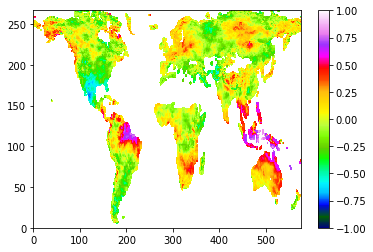

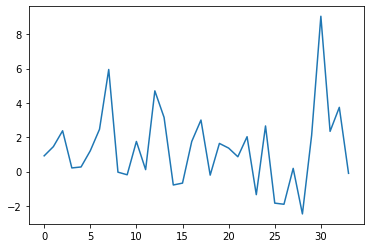

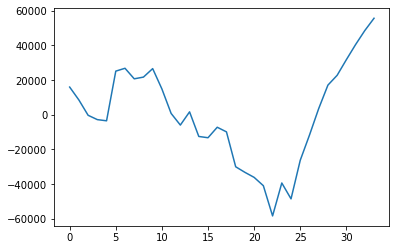

In [234]:
plt.figure(1)
plt.pcolormesh(coef, vmin = -1, vmax = 1, cmap = 'gist_ncar')
plt.colorbar()
plt.figure(2)
plt.plot(yearly_fwi_detrend[110,200,:])
plt.figure(3)
plt.plot(amazon_detrend)
#plt.scatter(amazon_detrend_delay, yearly_fwi_detrend[110,200,:])
slope,_,_,pval,_ = stats.linregress(amazon_detrend_delay[1:], yearly_fwi_detrend[110,200,1:])
print(slope, pval)

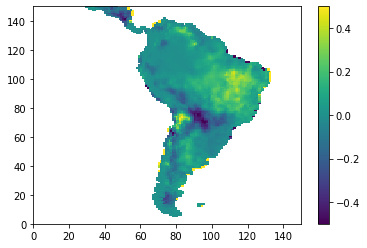

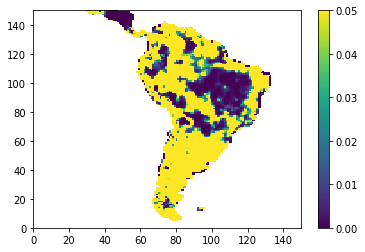

In [179]:
#Plot of august 2020
plt.figure(1)
plt.pcolormesh(t_trend_slope[0:150,100:250], vmin=-.5, vmax=.5)
plt.colorbar()
plt.figure(2)
plt.pcolormesh(t_trend_pvalue[0:150,100:250], vmin = 0, vmax = .05)
plt.colorbar()

In [ ]:
print((fwi_array[266,575,:]))
for i in range(267):
    for j in range(576):
        fwi_point = fwi_array[i,j,:]
        print(len(fwi_point))

In [34]:
trend_slope = np.empty([267, 576])
trend_intercept = np.empty([267, 576])
trend_rvalue = np.empty([267, 576])
trend_pvalue = np.empty([267, 576])
trend_stderr = np.empty([267, 576])
norm_time = np.array(nc_date_list) - np.array(nc_date_list)[0]
fwi_point = np.empty([476])
for i in range(267):
    for j in range(576):
        fwi_point = fwi_array[i,j,:]
        #print(np.nanmean(fwi_point))
        if((~np.isnan(np.nanmean(fwi_point)))):
            #print(np.nanmean(fwi_point))
            mask = ~np.isnan(fwi_point) & ~np.isnan(norm_time)
            trend_slope[i,j], trend_intercept[i,j], trend_rvalue[i,j], trend_pvalue[i,j], trend_stderr[i,j] = stats.linregress(norm_time[mask], fwi_point[mask])
        else:
            trend_slope[i,j] = np.float('NaN')
            trend_pvalue[i,j] = np.float('NaN')
        

<ipython-input-34-8d1971526984>:12: RuntimeWarning: Mean of empty slice
  if((~np.isnan(np.nanmean(fwi_point)))):
C:\Users\Patrick\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\Patrick\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\Patrick\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


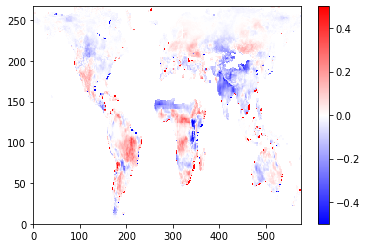

In [41]:
#trend_slope = trend_slope * 365
plt.pcolormesh(trend_slope, vmin=-.5, vmax = .5, cmap = 'bwr')
plt.colorbar()

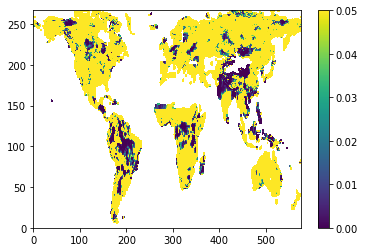

In [40]:
plt.pcolormesh(trend_pvalue, vmin = 0, vmax = 0.05)
plt.colorbar()

In [198]:
forest_cover = np.genfromtxt('deforestation.csv', delimiter = ',')
forest_cover_array = forest_cover[0]
defo = [0]
for i in range(1,34):
    defo.append(forest_cover_array[i] - forest_cover_array[i-1])
defo = np.array(defo)
print(defo)
deforestation = forest_cover_array - np.nanmean(forest_cover_array)
#print(deforestation)
final_deforestation = []
for i in range(len(deforestation)):
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
    final_deforestation.append(deforestation[i])
#print(len(final_deforestation))
#print(final_deforestation)
total_deforestation_arr = np.array(final_deforestation)
print(len(deforestation))

[     0. -23013. -24388. -18068. -16247.  13059. -13920. -21648. -14579.
 -10678. -27295. -29673. -22287.  -7948. -29752. -16303.  -9524. -18235.
 -35681. -18784. -18475. -20363. -32990.   3412. -24719.   6673.  -1073.
   -276.  -2039.  -9910.  -6559.  -6866.  -7488.  -8473.]
34


In [134]:
trend_slope_85 = np.empty([267, 576])
trend_intercept_85 = np.empty([267, 576])
trend_rvalue_85 = np.empty([267, 576])
trend_pvalue_85 = np.empty([267, 576])
trend_stderr_85 = np.empty([267, 576])
norm_time_85 = np.array(nc_date_list)[48:-20] - np.array(nc_date_list)[48]
fwi_point_85 = np.empty([427])
for i in range(267):
    for j in range(576):
        fwi_point_85 = fwi_array[i,j,48:-20]
        #print(np.nanmean(fwi_point))
        if((~np.isnan(np.nanmean(fwi_point_85)))):
            #print(np.nanmean(fwi_point))
            mask = ~np.isnan(fwi_point_85) & ~np.isnan(total_deforestation_arr)
            trend_slope_85[i,j], trend_intercept_85[i,j], trend_rvalue_85[i,j], trend_pvalue_85[i,j], trend_stderr_85[i,j] = stats.linregress(total_deforestation_arr[mask], fwi_point_85[mask])
        else:
            trend_slope_85[i,j] = np.float('NaN')
            trend_pvalue_85[i,j] = np.float('NaN')

<ipython-input-134-6ac31e96eef3>:12: RuntimeWarning: Mean of empty slice
  if((~np.isnan(np.nanmean(fwi_point_85)))):


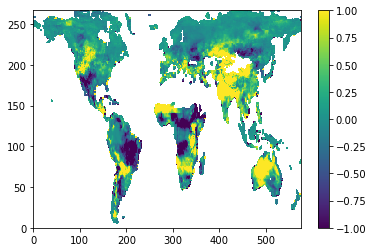

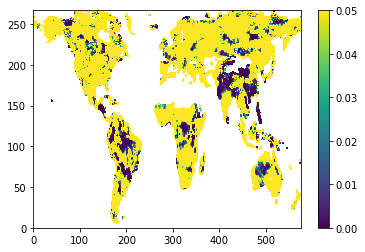

In [140]:
plt.figure(1)
plt.pcolormesh(trend_slope_85*100000, vmin=-1, vmax=1)
plt.colorbar()
plt.figure(2)
plt.pcolormesh(trend_pvalue_85, vmin=0, vmax=.05)
plt.colorbar()

In [116]:
norm_time_85 = np.array(nc_date_list)[48:-1] - np.array(nc_date_list)[48]
print(len(norm_time_85))

427


476
476


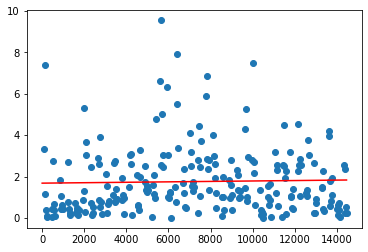

In [93]:
plt.scatter(norm_time, fwi_array[220,500,:])
russia = fwi_array[220,500,:]
print(len(russia))
print(len(norm_time))
mask = ~np.isnan(russia) & ~np.isnan(norm_time)
slope,intercept,_,_,_ = stats.linregress(norm_time[mask], russia[mask])
x = np.linspace(0,14457,50)
y = slope*x+intercept
plt.plot(x,y,c='r')